In [ ]:
## Load the dataset
import pandas as pd

df = pd.read_csv("hf://datasets/AzharAli05/Resume-Screening-Dataset/dataset.csv")

df.head()

,Role,Resume,Decision,Reason_for_decision,Job_Description
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...,reject,Lacked leadership skills for a senior position.,Be part of a passionate team at the forefront ...
1,Game Developer,Here's a professional resume for Ann Marshall:...,select,Strong technical skills in AI and ML.,Help us build the next-generation products as ...
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...,reject,Insufficient system design expertise for senio...,We need a Human Resources Specialist to enhanc...
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...,select,Impressive leadership and communication abilit...,Be part of a passionate team at the forefront ...
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...,reject,Lacked leadership skills for a senior position.,We are looking for an experienced E-commerce S...


In [ ]:
import re

## Clean the resumes and descriptions by removing filler words
words_to_omit = ["*", " for ", "(", ")", " a ", " the ", " in ", " and ", ",", "professional", " to ",
                 " with ", " motivated ", "[", "]", "{", "}", " of ", " by ", " using ", " that ", " at ",
                 " through ", "highly", " other ", "\n", "we're ", "looking", "seeking", "be ", " part ",
                 " an ", " are ", " you ", " us ", " is ", "here", "job description", " am ", " my ", " has "]

def cleanedText(text):
  cleanText = text.lower()
  for word in words_to_omit:
    cleanText = re.sub(re.escape(word), " ", cleanText)
  return cleanText

clean_resumes = []
clean_descriptions = []

resumes = df["Resume"].tolist()

for resume in resumes:
  clean_resumes.append(cleanedText(resume))

for description in df["Job_Description"].tolist():
  clean_descriptions.append(cleanedText(description))

df["Clean Resumes"] = clean_resumes
df["Clean Descriptions"] = clean_descriptions

## Turn the Decision column into a Binary result column
binary_values = []

for decision in df["Decision"].tolist():
  if decision == "reject":
    binary_values.append(0)
  else:
    binary_values.append(1)

df["Binary Result"] = binary_values

## Delete unnecessary column
if("Reason_for_decision" in df):
  del df["Reason_for_decision"]

df.head()

,Role,Resume,Decision,Job_Description,Clean Resumes,Clean Descriptions,Binary Result
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...,reject,Be part of a passionate team at the forefront ...,'s resume jason jones: jason jones e-comme...,passionate team forefront machine learning as...,0
1,Game Developer,Here's a professional resume for Ann Marshall:...,select,Help us build the next-generation products as ...,'s resume ann marshall: ann marshall conta...,help build next-generation products as game de...,1
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...,reject,We need a Human Resources Specialist to enhanc...,'s resume patrick mcclain: patrick mcclain...,we need human resources specialist enhance our...,0
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...,select,Be part of a passionate team at the forefront ...,'s resume patricia gray: patricia gray con...,passionate team forefront cloud computing as ...,1
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...,reject,We are looking for an experienced E-commerce S...,'s resume amanda gross: amanda gross conta...,we experienced e-commerce specialist join ou...,0


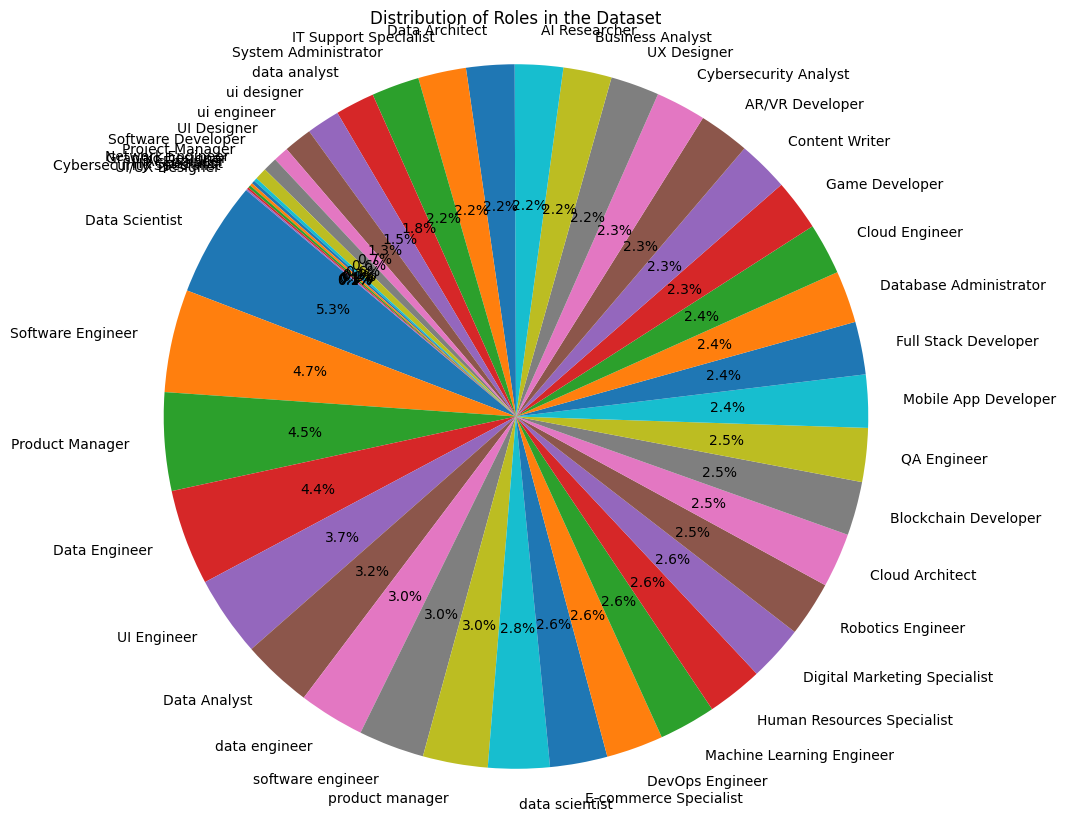

In [ ]:
## Visualize each role in the dataset using a piechart
import matplotlib.pyplot as plt
import seaborn as sns

role_counts = df['Role'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Roles in the Dataset')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import numpy as np

## These are fundamental terms on a resume
key_terms = ["education:", "skills:", "summary:", "experience:",
             "achievements:", "certifications:", "references:"]

def resume_parser(index):
  test_resume = df["Clean Resumes"][index].lower()

  indices = []

  for term in key_terms:
    indices.append(test_resume.find(term))

  test_dict = dict(zip(indices, key_terms))
  test_dict = dict(sorted(test_dict.items()))

  resume_parsed = {}

  key_list = list(test_dict.keys())

  for i in range(len(key_list) - 1):
    key1, key2 = key_list[i], key_list[i + 1]
    resume_parsed[test_dict[key1]] = test_resume[key1:key2]

  return resume_parsed

In [ ]:
## The most important packages for text analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

st = SentenceTransformer("paraphrase-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
## Compare the job description to each section of the resume and return the results
def similarities_to_description(index):
  description = df.loc[index]["Clean Descriptions"]
  resume = resume_parser(index)

  similarity_scores = []

  vectorizer = TfidfVectorizer()

  for term in key_terms:
    if(term not in resume):
      similarity_scores.append(0)
      continue
    corpus = [resume[term], description]
    tfidf_matrix = vectorizer.fit_transform(corpus)

    similarity_score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

    similarity_scores.append(float(similarity_score))
  return similarity_scores

similarity_vectors = [similarities_to_description(i) for i in range(len(df))]
results = df["Binary Result"].tolist()

In [ ]:
## Create, train, and visualize a model through tensorflow keras

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

def create_model(X, y):
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    input_dim = X.shape[1]

    model = tf.keras.Sequential([tf.keras.layers.Input(shape=(input_dim,)), tf.keras.layers.Dense(64, activation="relu"), tf.keras.layers.Dense(32, activation="relu"), tf.keras.layers.Dense(1, activation="sigmoid")])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("Validation accuracy:", acc)

    y_pred_binary = (model.predict(X) > 0.5).astype(int)
    cm = confusion_matrix(y, y_pred_binary)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()

    y_pred_prob = model.predict(X).ravel()
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return acc

Validation accuracy: 0.5012285113334656
318/318 [==============================] - 1s 2ms/step


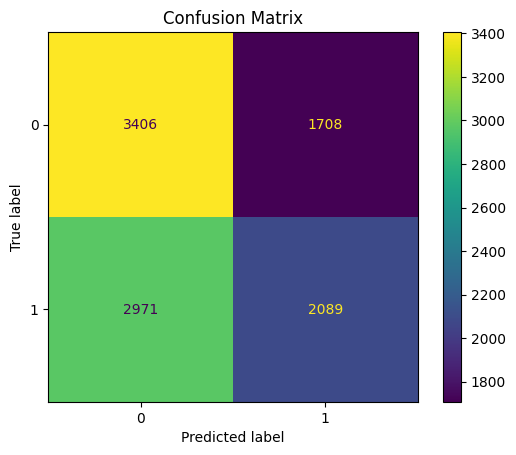

318/318 [==============================] - 0s 1ms/step


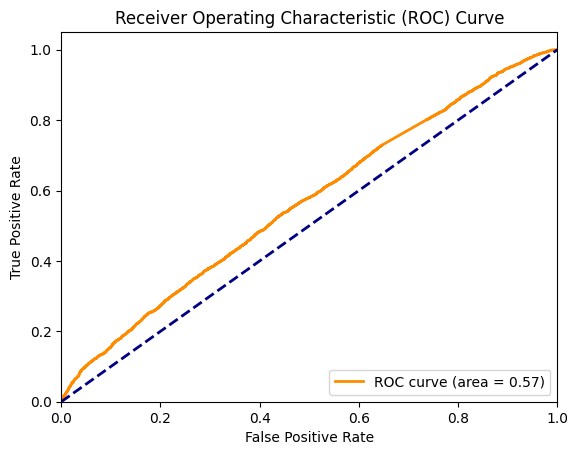

0.5012285113334656

In [ ]:
create_model(similarity_vectors, results)

In [ ]:
## Visualize the similarity of resume sections to job description, and compare hire vs reject
plt.figure(figsize=(12, 7))
sns.barplot(x='Resume Section', y='Average Similarity Score', hue='Binary Result', data=plot_df, palette={'Selected': 'skyblue', 'Rejected': 'salmon'})
plt.title('Average Similarity Scores by Resume Section and Hiring Decision')
plt.xlabel('Resume Section')
plt.ylabel('Average Similarity Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Hiring Decision')
plt.tight_layout()
plt.show()

NameError: name 'plot_df' is not defined

<Figure size 1200x700 with 0 Axes>

In [ ]:
def role_based_embeddings(role):
  embeddings = st.encode(df.loc[df["Role"].str.lower() == role.lower(), "Clean Resumes"].tolist())
  results = df.loc[df["Role"].str.lower() == role.lower(), "Binary Result"].tolist()
  return embeddings, results

def role_model(role):
  role = role.lower()
  embeddings, results = role_based_embeddings(role)
  if len(embeddings) > 1 and len(results) > 1:
      model = create_model(embeddings, results)
      return model
  else:
      print("Not enough data for role ", role, " to train a model.")
      return None


Training model for role:  e-commerce specialist
Validation accuracy: 0.31481480598449707
9/9 [==============================] - 0s 2ms/step


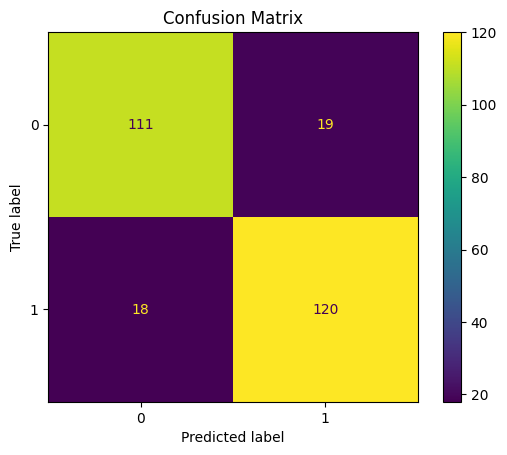

9/9 [==============================] - 0s 2ms/step


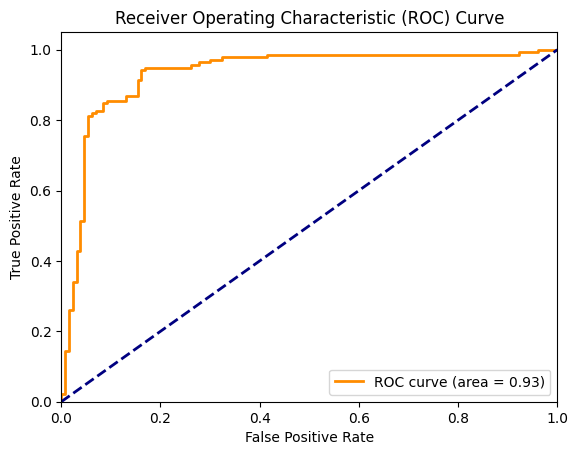


Training model for role:  game developer
Validation accuracy: 0.5416666865348816
8/8 [==============================] - 0s 2ms/step


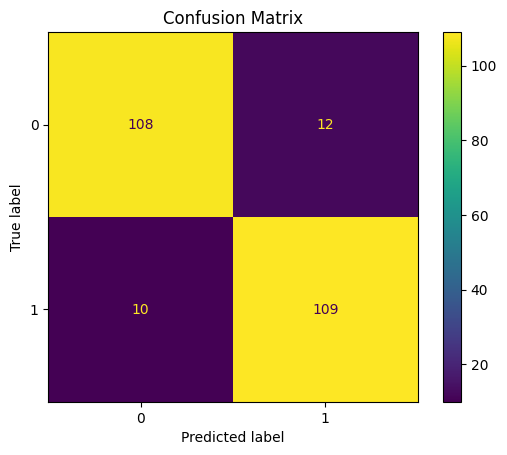

8/8 [==============================] - 0s 2ms/step


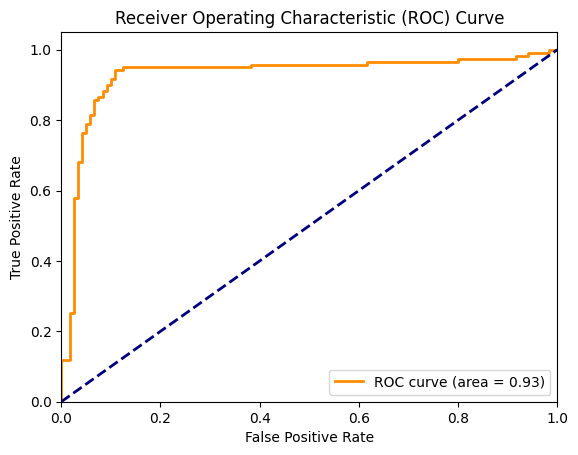


Training model for role:  human resources specialist
Validation accuracy: 0.3962264060974121
9/9 [==============================] - 0s 2ms/step


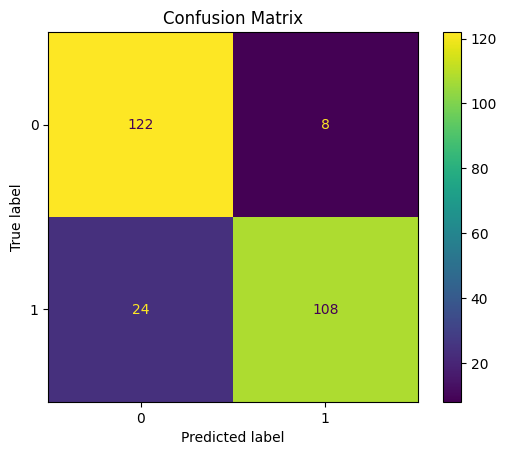

9/9 [==============================] - 0s 2ms/step


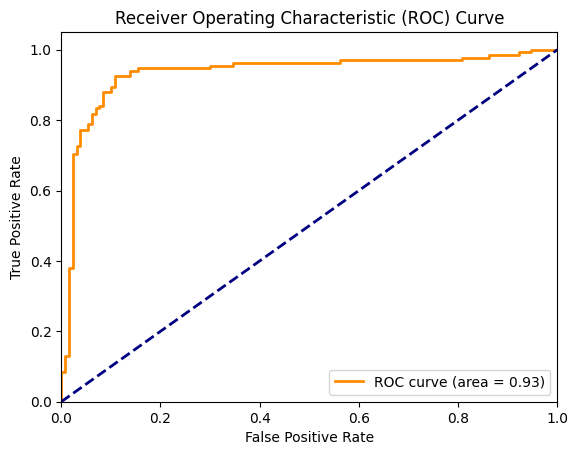


Training model for role:  mobile app developer
Validation accuracy: 0.5
8/8 [==============================] - 0s 3ms/step


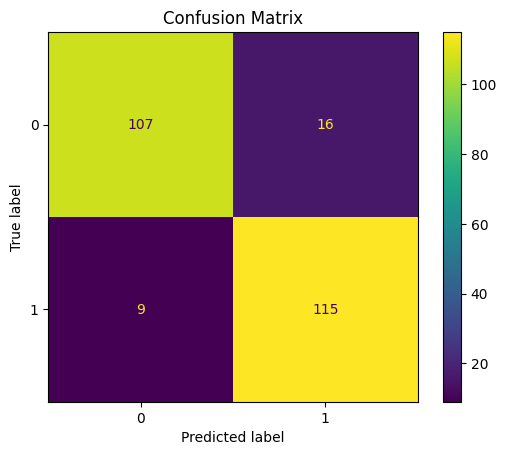

8/8 [==============================] - 0s 3ms/step


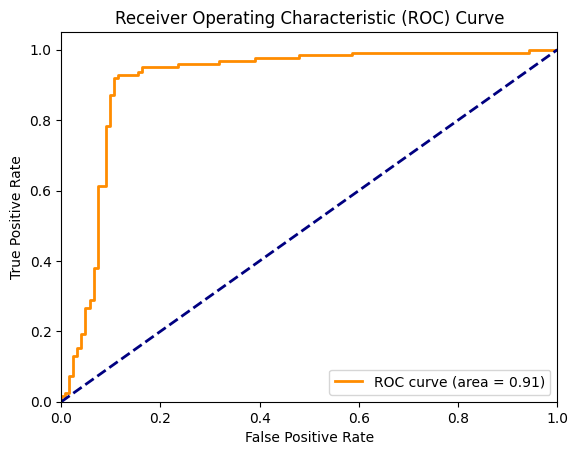


Training model for role:  ux designer
Validation accuracy: 0.5869565010070801
8/8 [==============================] - 0s 2ms/step


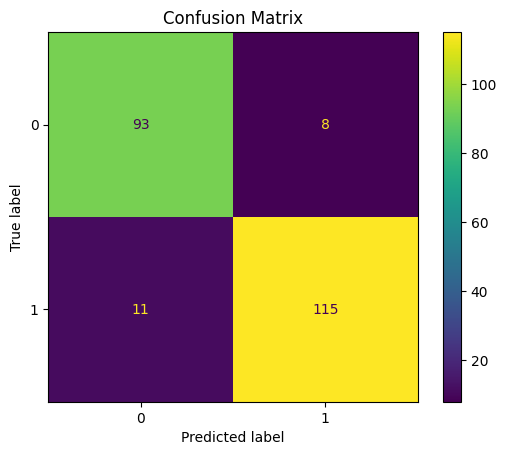

8/8 [==============================] - 0s 2ms/step


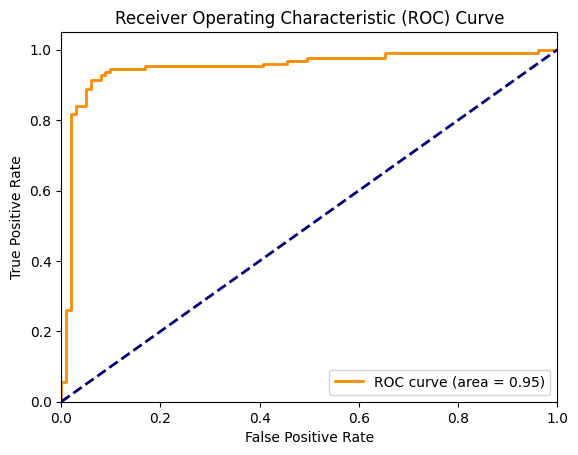


Training model for role:  cloud engineer
Validation accuracy: 0.4791666567325592
8/8 [==============================] - 0s 2ms/step


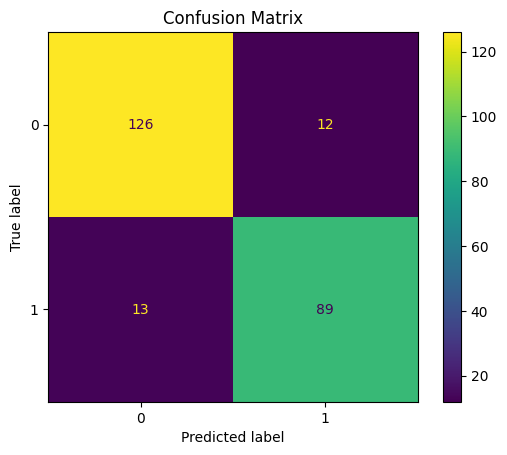

8/8 [==============================] - 0s 3ms/step


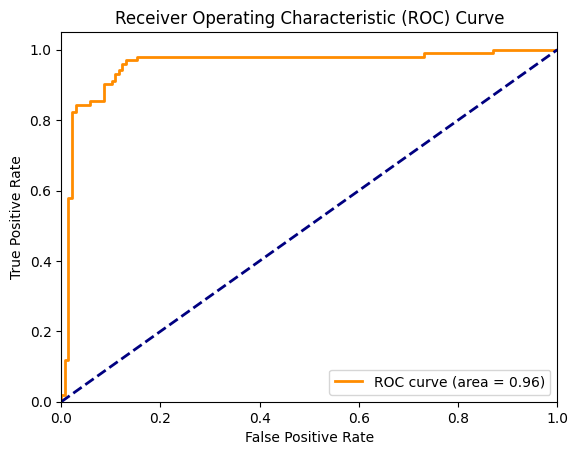


Training model for role:  digital marketing specialist
Validation accuracy: 0.4038461446762085
9/9 [==============================] - 0s 3ms/step


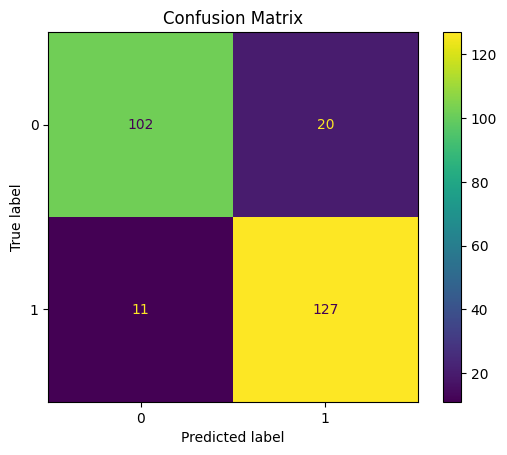

9/9 [==============================] - 0s 3ms/step


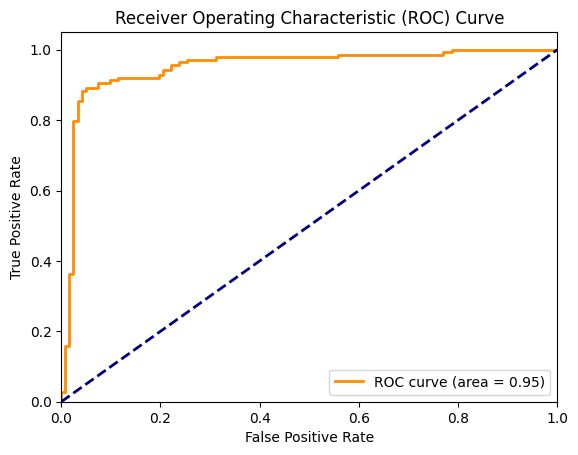


Training model for role:  ai researcher
Validation accuracy: 0.5111111402511597
8/8 [==============================] - 0s 2ms/step


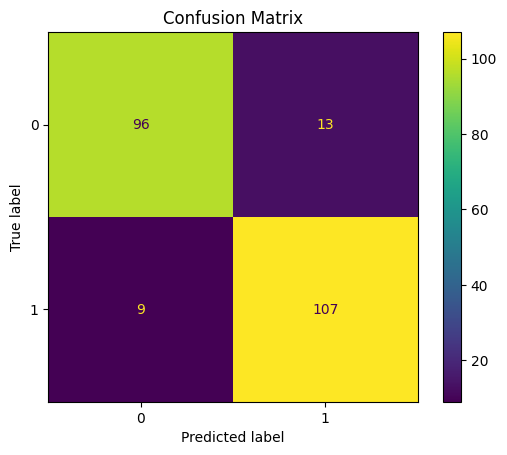

8/8 [==============================] - 0s 2ms/step


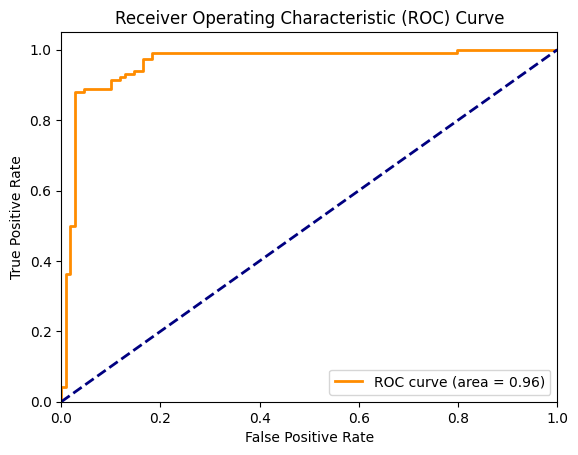


Training model for role:  ui engineer
Validation accuracy: 0.4215686321258545
16/16 [==============================] - 0s 3ms/step


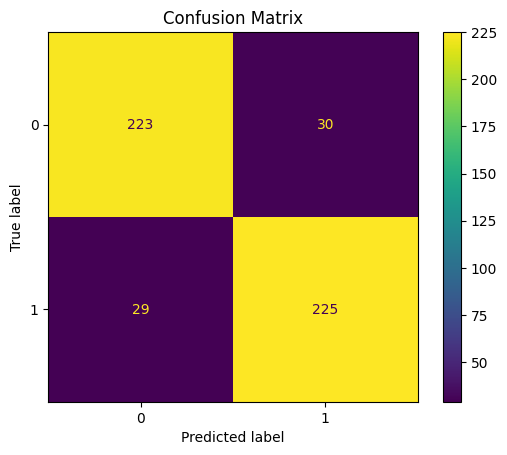

16/16 [==============================] - 0s 3ms/step


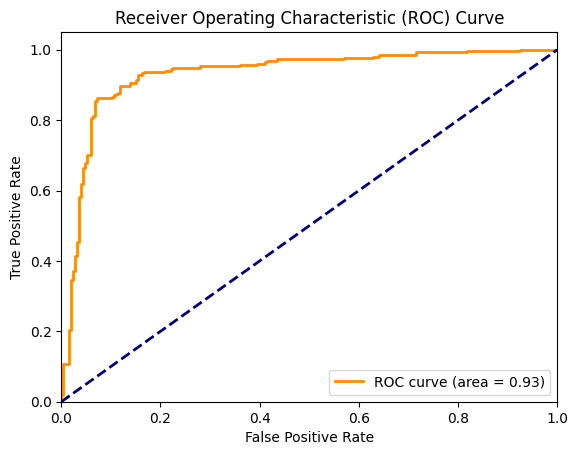


Training model for role:  ar/vr developer
Validation accuracy: 0.625
8/8 [==============================] - 0s 2ms/step


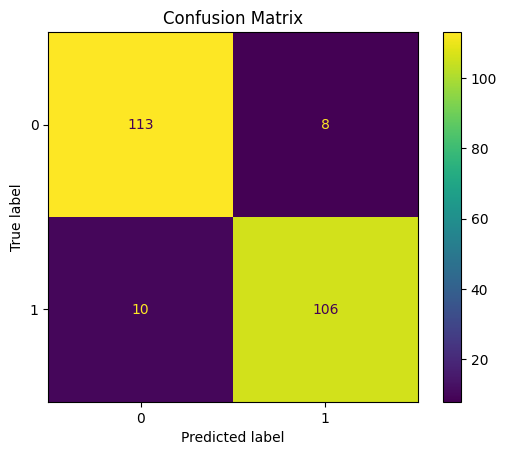

8/8 [==============================] - 0s 2ms/step


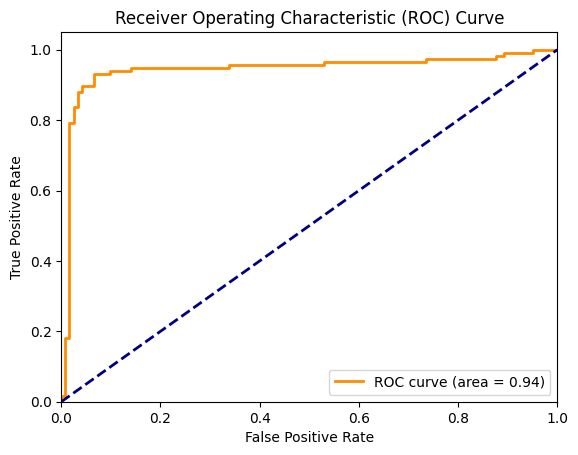


Training model for role:  machine learning engineer
Validation accuracy: 0.5849056839942932
9/9 [==============================] - 0s 2ms/step


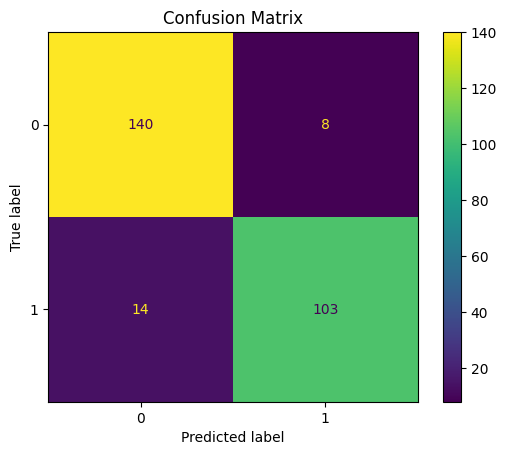

9/9 [==============================] - 0s 2ms/step


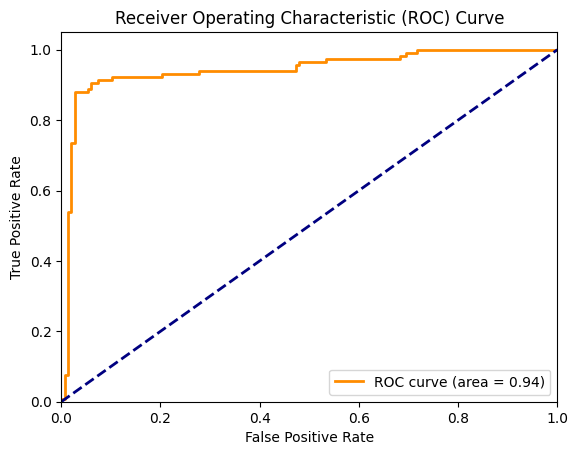


Training model for role:  database administrator
Validation accuracy: 0.5918367505073547
8/8 [==============================] - 0s 2ms/step


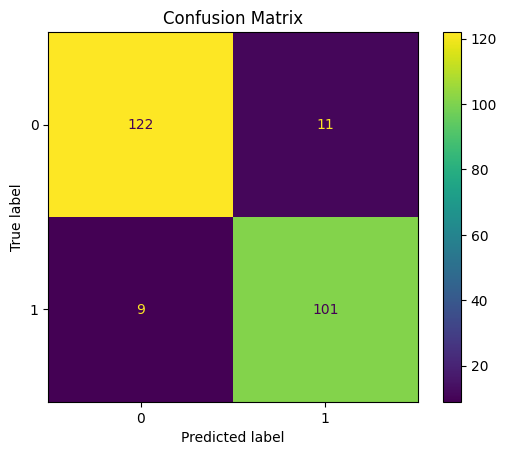

8/8 [==============================] - 0s 2ms/step


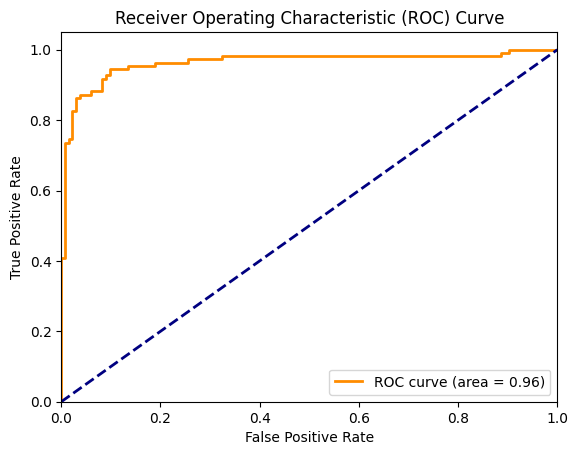


Training model for role:  data engineer
Validation accuracy: 0.5894039869308472
24/24 [==============================] - 0s 2ms/step


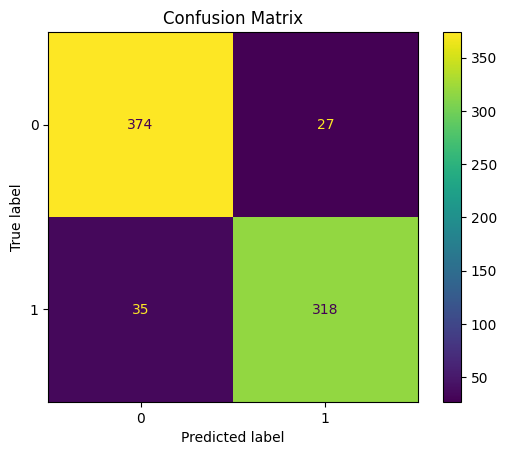

24/24 [==============================] - 0s 2ms/step


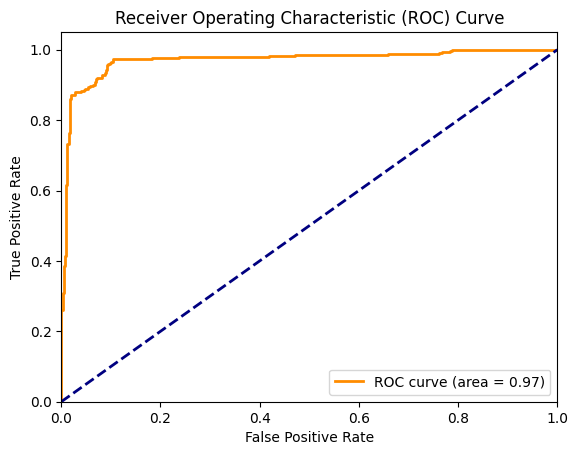


Training model for role:  cybersecurity analyst
Validation accuracy: 0.5106382966041565
8/8 [==============================] - 0s 3ms/step


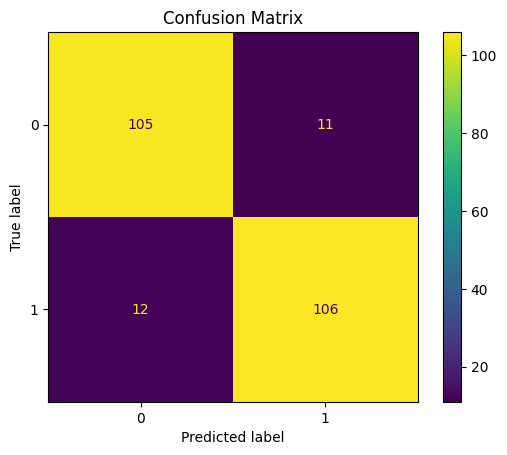

8/8 [==============================] - 0s 5ms/step


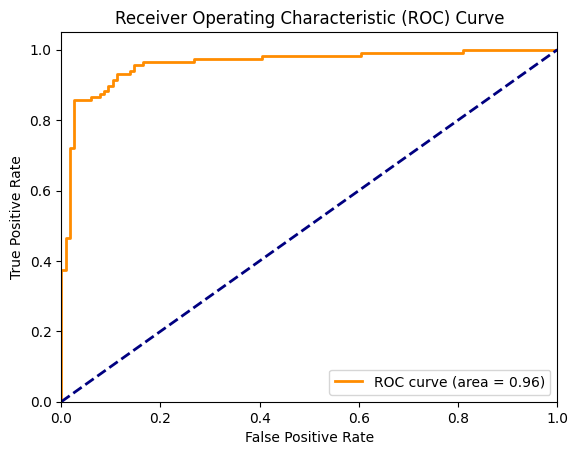


Training model for role:  robotics engineer
Validation accuracy: 0.5
9/9 [==============================] - 0s 4ms/step


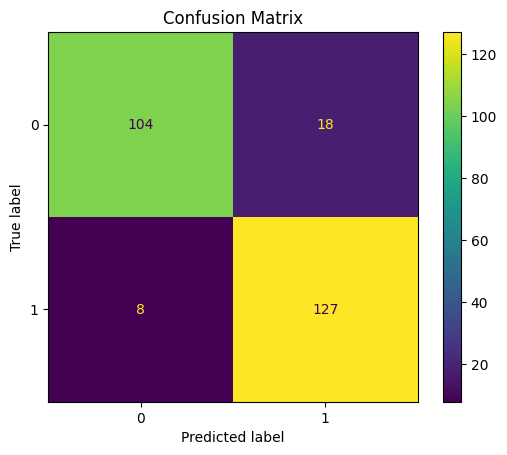

9/9 [==============================] - 0s 4ms/step


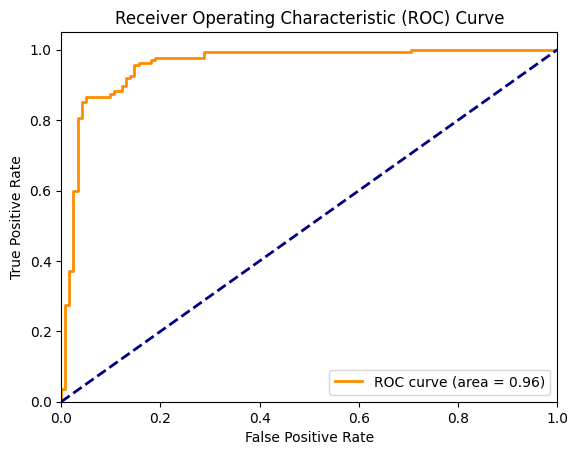


Training model for role:  business analyst
Validation accuracy: 0.52173912525177
8/8 [==============================] - 0s 2ms/step


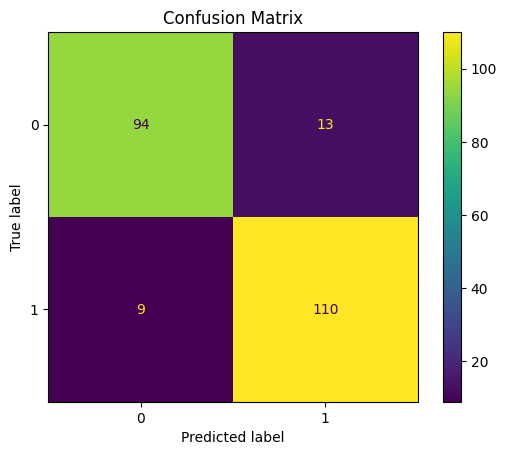

8/8 [==============================] - 0s 3ms/step


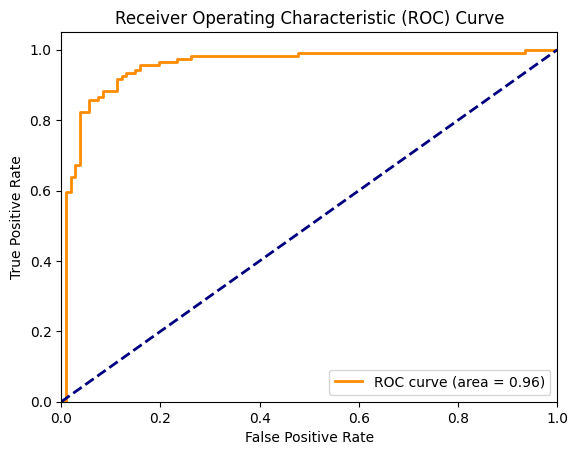


Training model for role:  data analyst
Validation accuracy: 0.6504854559898376
16/16 [==============================] - 0s 2ms/step


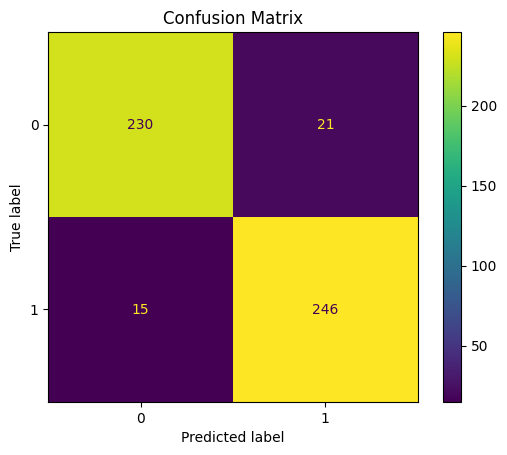

16/16 [==============================] - 0s 2ms/step


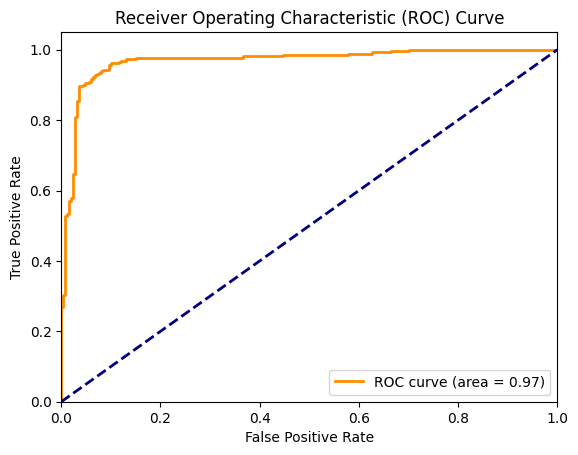


Training model for role:  cloud architect
Validation accuracy: 0.6078431606292725
8/8 [==============================] - 0s 3ms/step


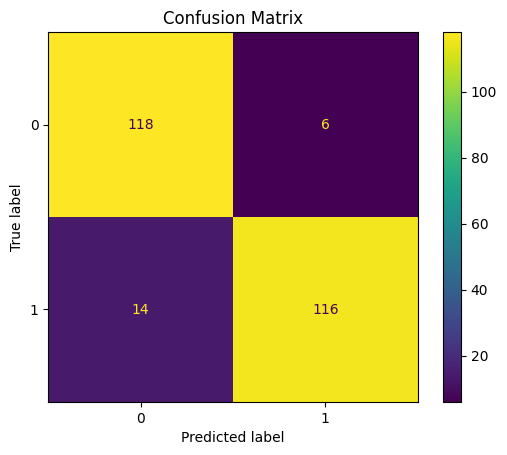

8/8 [==============================] - 0s 3ms/step


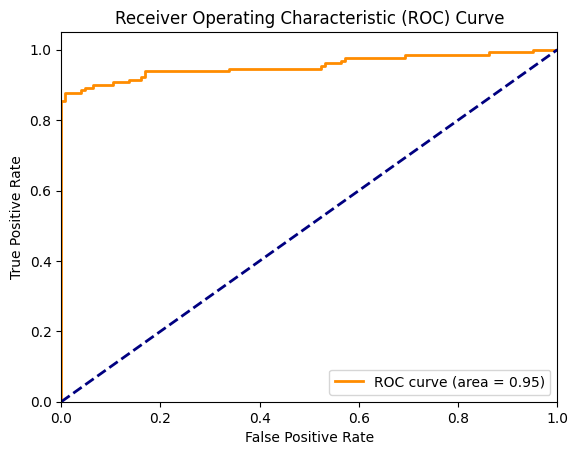


Training model for role:  data architect
Validation accuracy: 0.35555556416511536
8/8 [==============================] - 0s 3ms/step


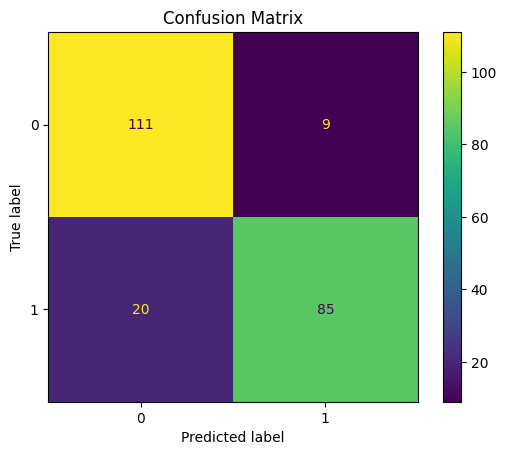

8/8 [==============================] - 0s 2ms/step


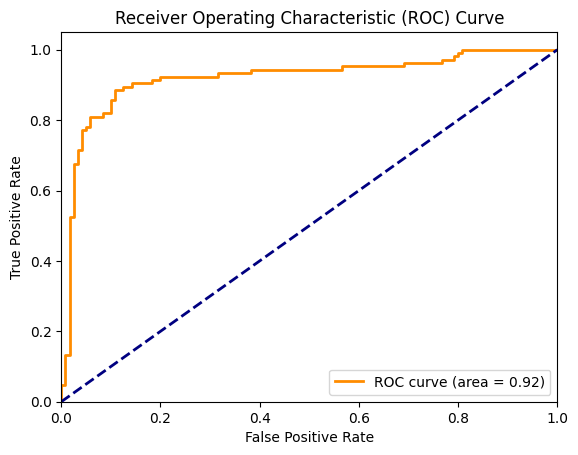


Training model for role:  qa engineer
Validation accuracy: 0.529411792755127
8/8 [==============================] - 0s 2ms/step


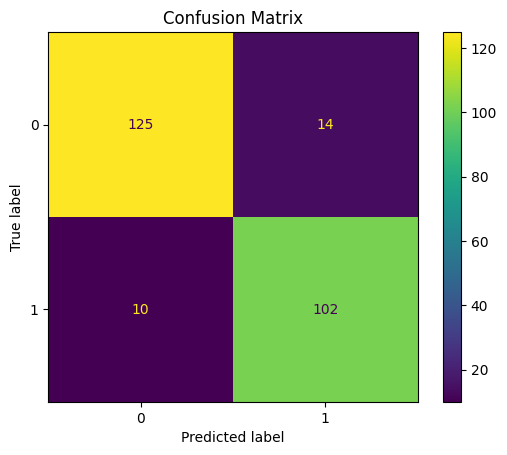

8/8 [==============================] - 0s 3ms/step


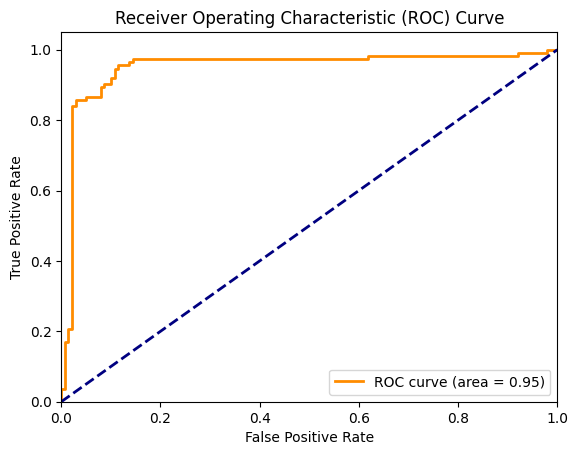


Training model for role:  system administrator
Validation accuracy: 0.5333333611488342
7/7 [==============================] - 0s 4ms/step


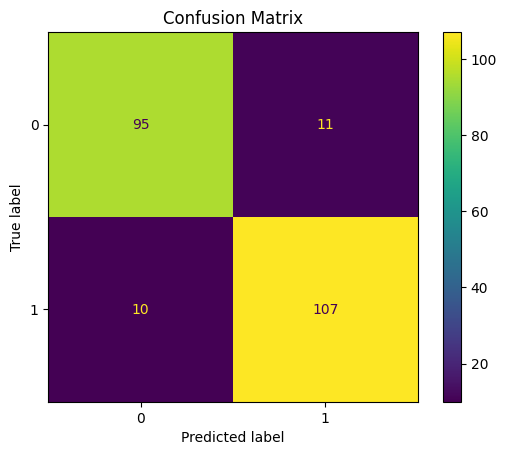

7/7 [==============================] - 0s 3ms/step


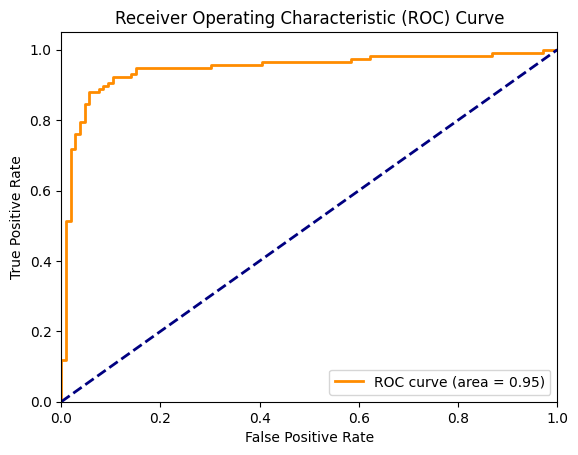


Training model for role:  devops engineer
Validation accuracy: 0.4444444477558136
9/9 [==============================] - 0s 2ms/step


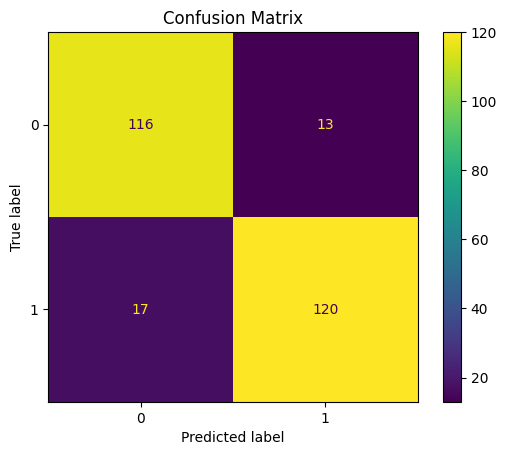

9/9 [==============================] - 0s 2ms/step


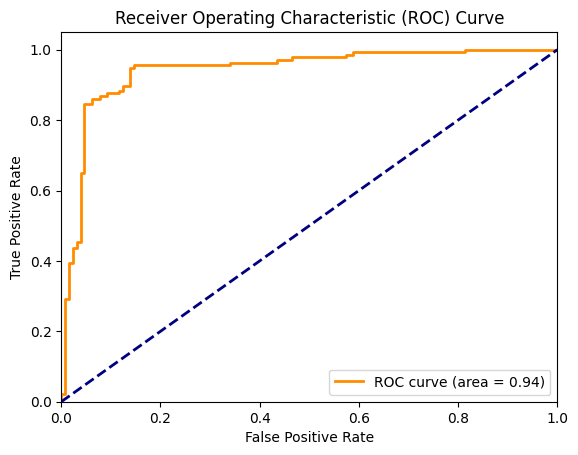


Training model for role:  product manager
Validation accuracy: 0.5882353186607361
24/24 [==============================] - 0s 2ms/step


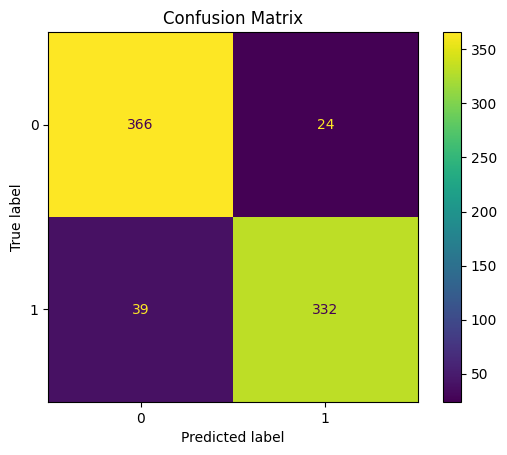

24/24 [==============================] - 0s 2ms/step


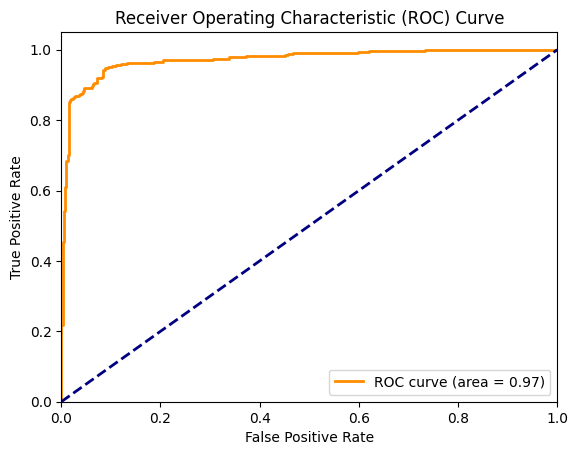


Training model for role:  data scientist
Validation accuracy: 0.6848484873771667
26/26 [==============================] - 0s 3ms/step


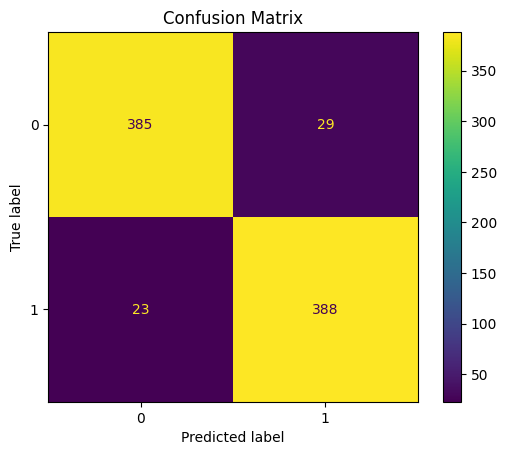

26/26 [==============================] - 0s 2ms/step


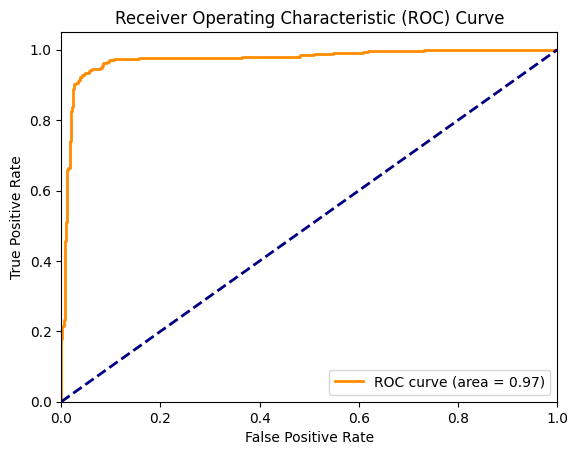


Training model for role:  full stack developer
Validation accuracy: 0.46000000834465027
8/8 [==============================] - 0s 3ms/step


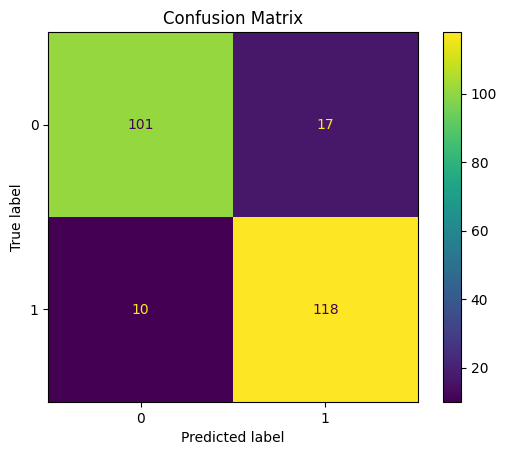

8/8 [==============================] - 0s 2ms/step


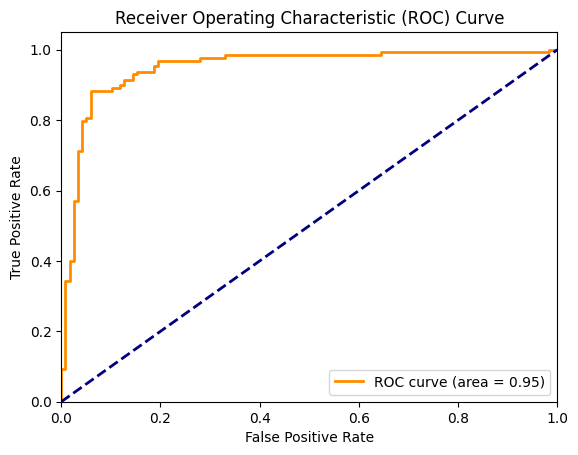


Training model for role:  blockchain developer
Validation accuracy: 0.47058823704719543
8/8 [==============================] - 0s 2ms/step


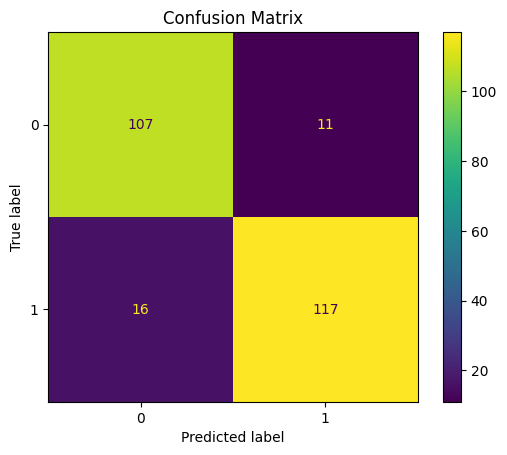

8/8 [==============================] - 0s 2ms/step


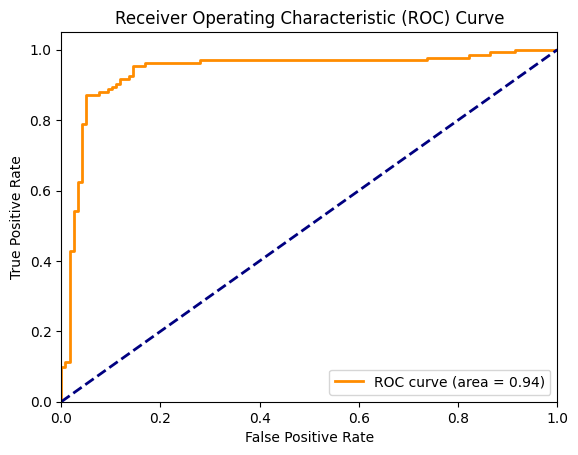


Training model for role:  software engineer
Validation accuracy: 0.5886076092720032
25/25 [==============================] - 0s 2ms/step


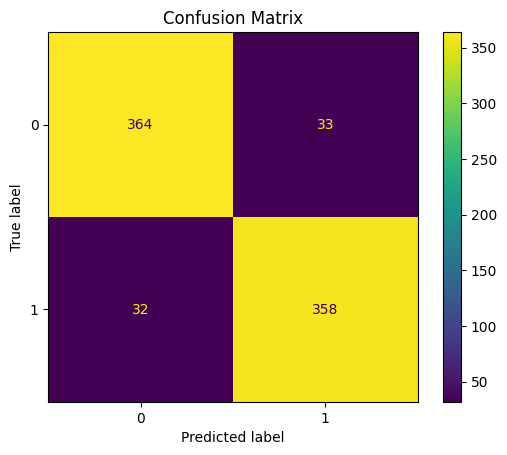

25/25 [==============================] - 0s 2ms/step


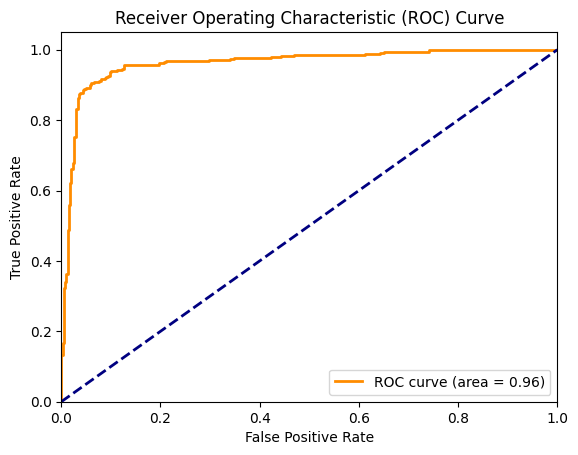


Training model for role:  content writer
Validation accuracy: 0.5416666865348816
8/8 [==============================] - 0s 3ms/step


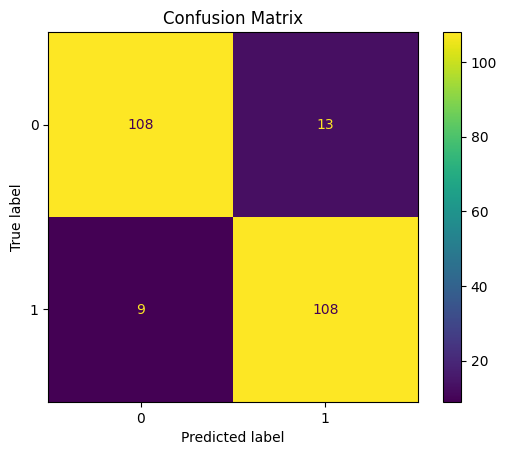

8/8 [==============================] - 0s 4ms/step


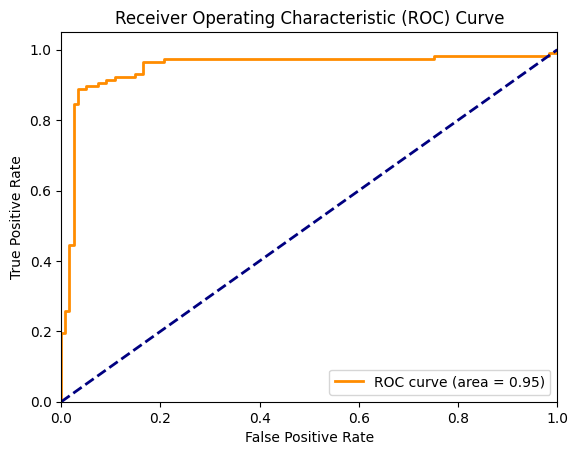


Training model for role:  it support specialist
Validation accuracy: 0.4888888895511627
7/7 [==============================] - 0s 3ms/step


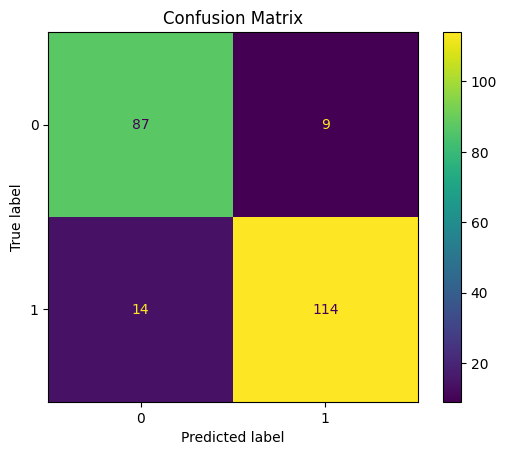

7/7 [==============================] - 0s 3ms/step


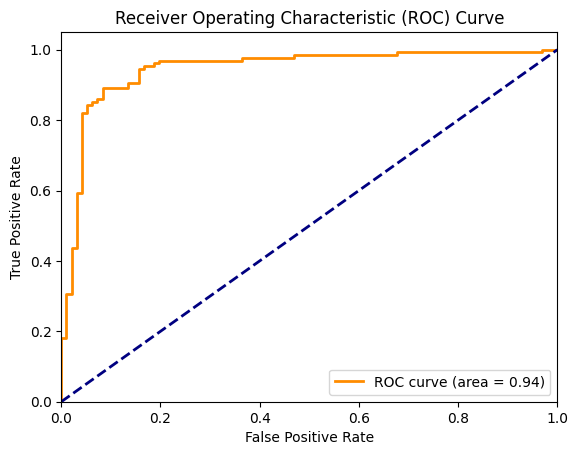


Training model for role:  ui designer
Validation accuracy: 0.97826087474823
8/8 [==============================] - 0s 3ms/step


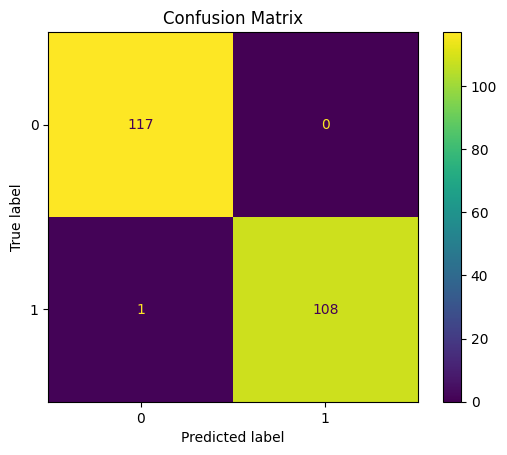

8/8 [==============================] - 0s 2ms/step


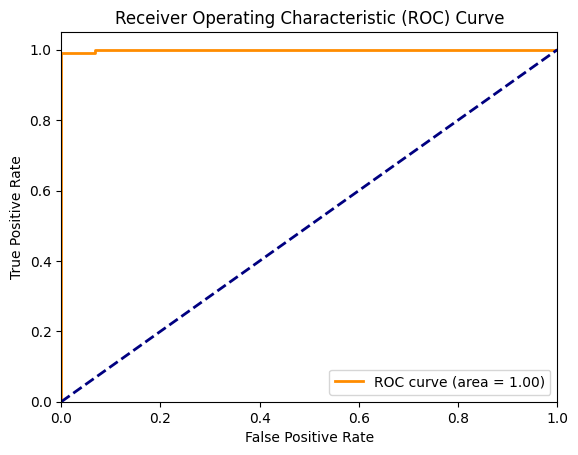


Training model for role:  cybersecurity specialist
Validation accuracy: 0.5
1/1 [==============================] - 0s 45ms/step


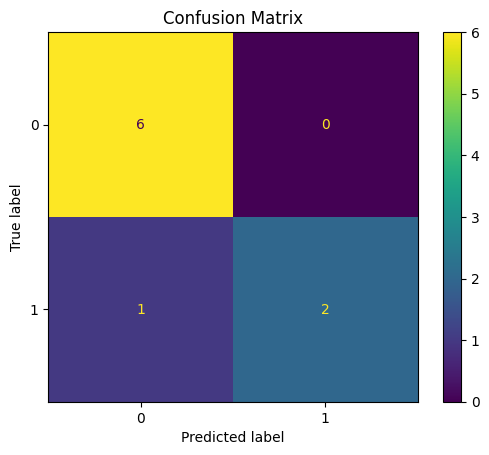

1/1 [==============================] - 0s 18ms/step


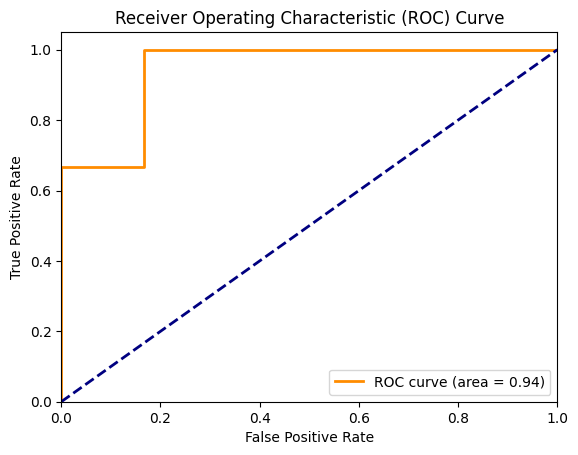


Training model for role:  hr specialist
Validation accuracy: 0.3333333432674408
1/1 [==============================] - 0s 42ms/step


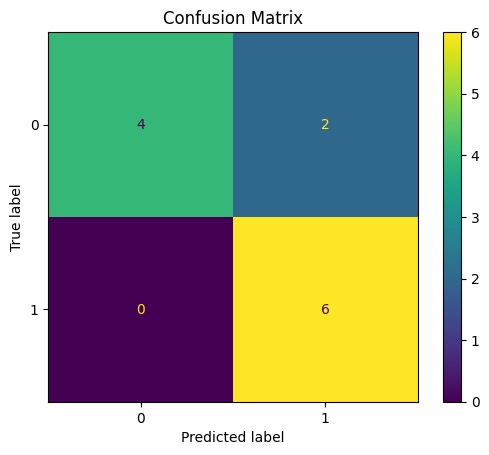

1/1 [==============================] - 0s 21ms/step


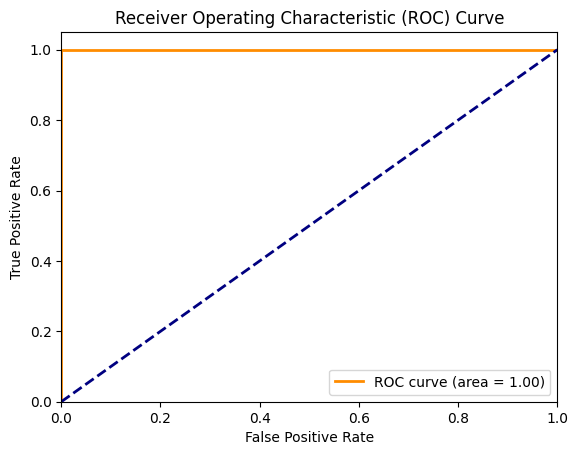


Training model for role:  network engineer
Validation accuracy: 0.5
1/1 [==============================] - 0s 43ms/step


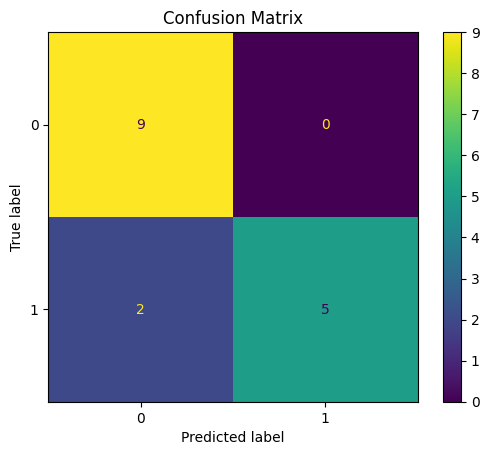

1/1 [==============================] - 0s 20ms/step


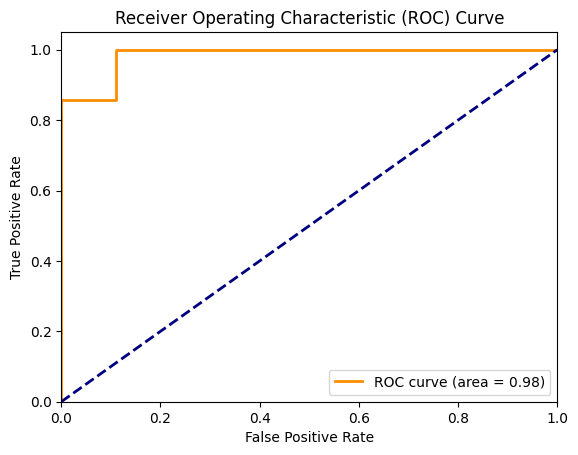


Training model for role:  graphic designer
Validation accuracy: 0.3333333432674408
1/1 [==============================] - 0s 43ms/step


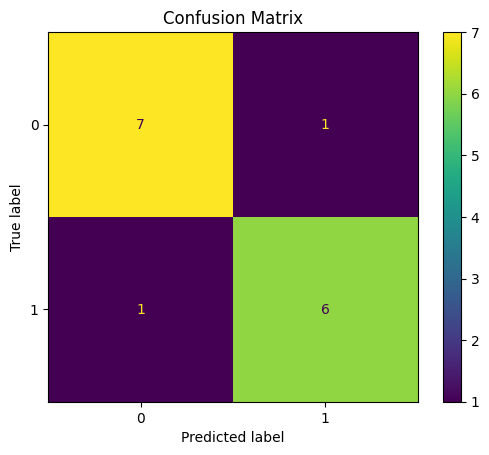

1/1 [==============================] - 0s 18ms/step


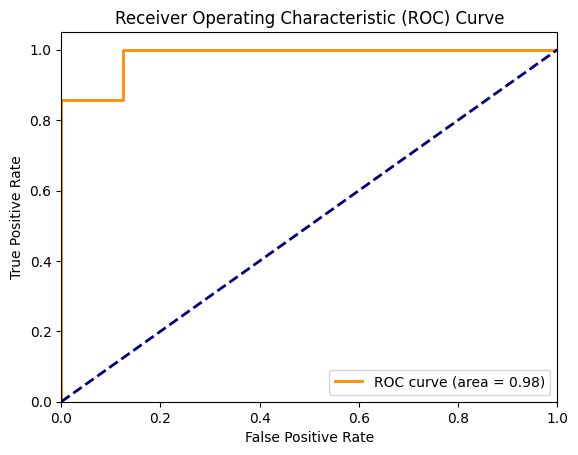


Training model for role:  ui/ux designer
Validation accuracy: 0.0
1/1 [==============================] - 0s 45ms/step


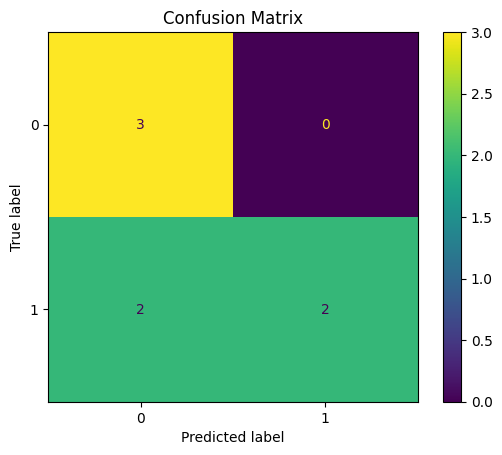

1/1 [==============================] - 0s 17ms/step


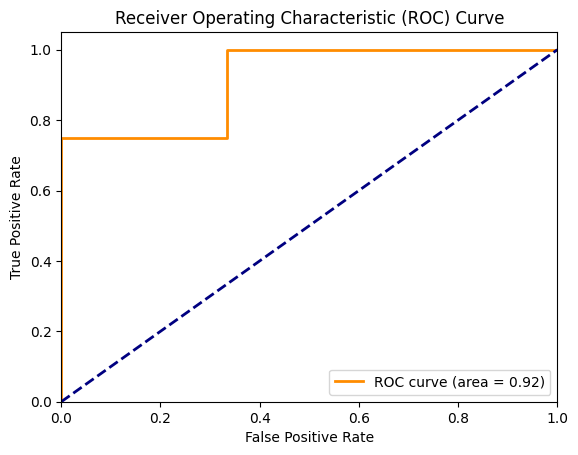


Training model for role:  ai engineer
Validation accuracy: 0.3333333432674408
1/1 [==============================] - 0s 47ms/step


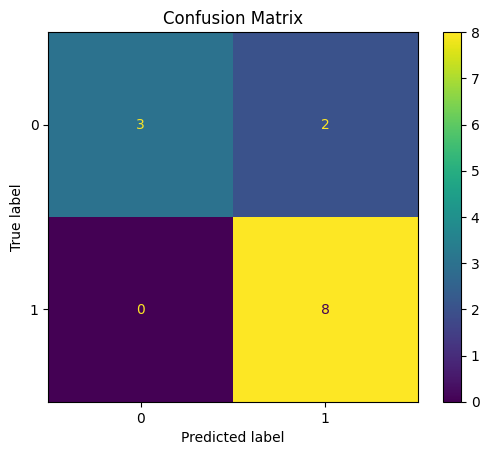

1/1 [==============================] - 0s 17ms/step


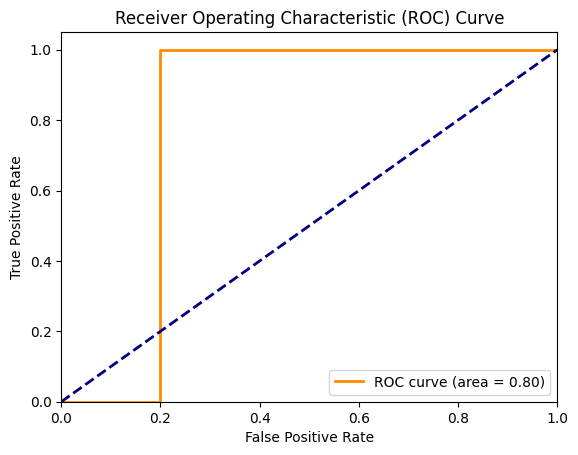


Training model for role:  project manager
Validation accuracy: 0.8333333134651184
2/2 [==============================] - 0s 4ms/step


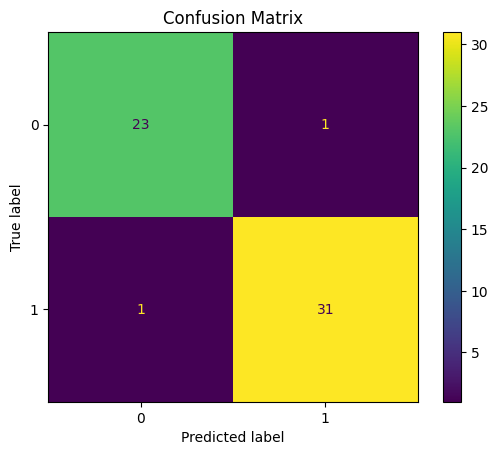

2/2 [==============================] - 0s 5ms/step


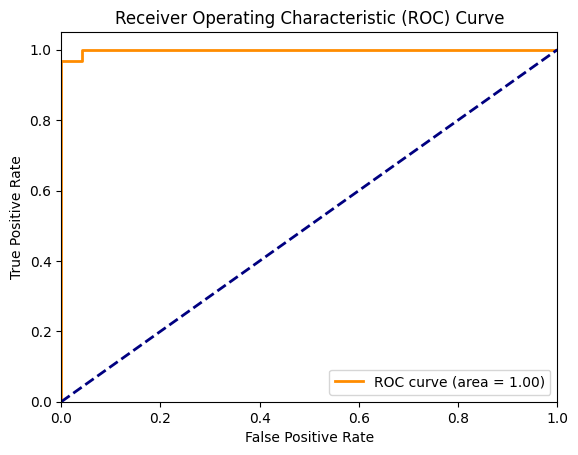


Training model for role:  software developer
Validation accuracy: 1.0
3/3 [==============================] - 0s 4ms/step


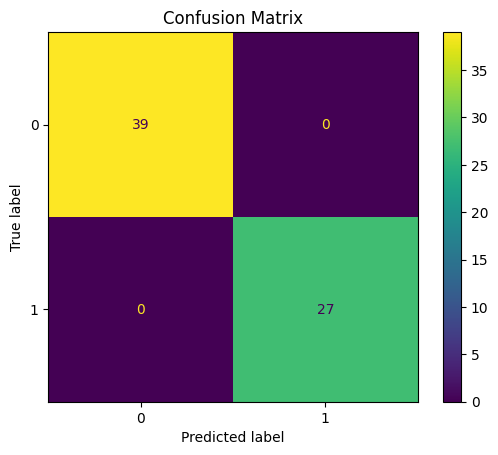

3/3 [==============================] - 0s 3ms/step


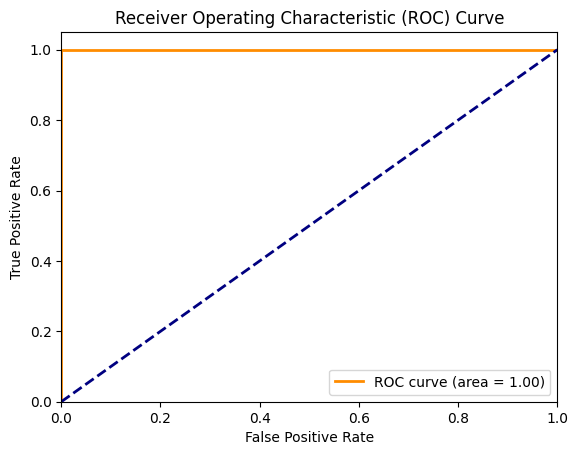


Training model for role:  product manager
Validation accuracy: 0.5882353186607361
24/24 [==============================] - 0s 2ms/step


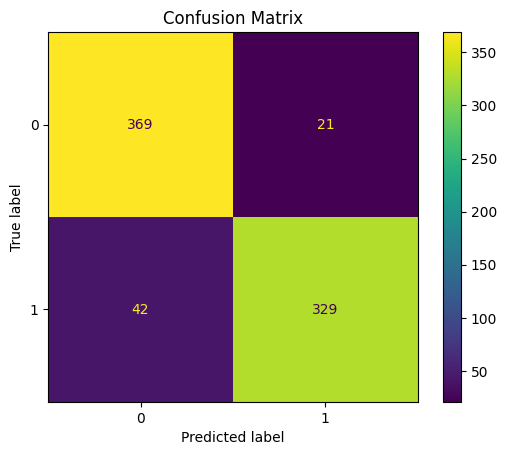

24/24 [==============================] - 0s 2ms/step


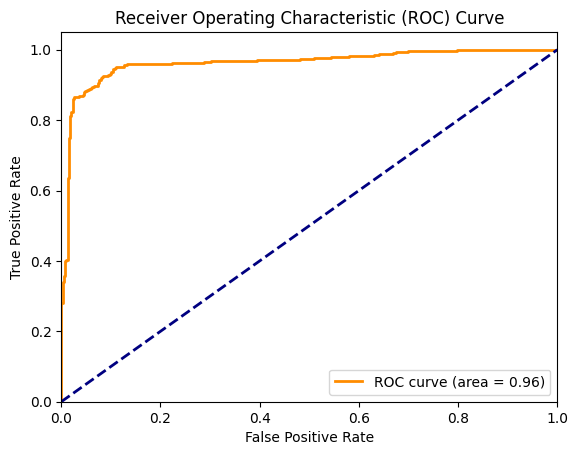


Training model for role:  software engineer
Validation accuracy: 0.6139240264892578
25/25 [==============================] - 0s 2ms/step


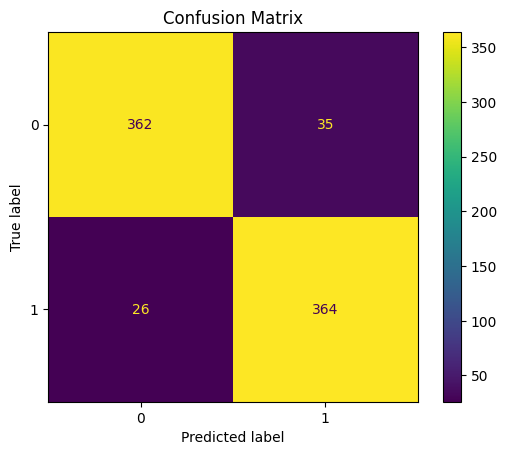

25/25 [==============================] - 0s 2ms/step


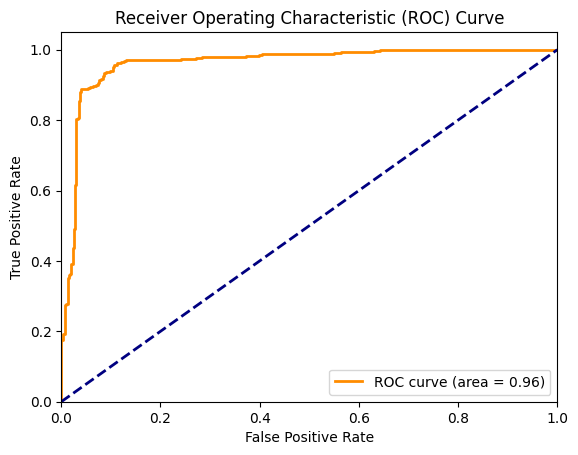


Training model for role:  data engineer
Validation accuracy: 0.6887417435646057
24/24 [==============================] - 0s 2ms/step


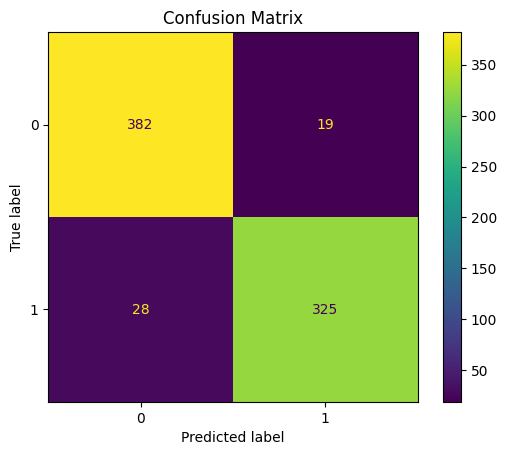

24/24 [==============================] - 0s 2ms/step


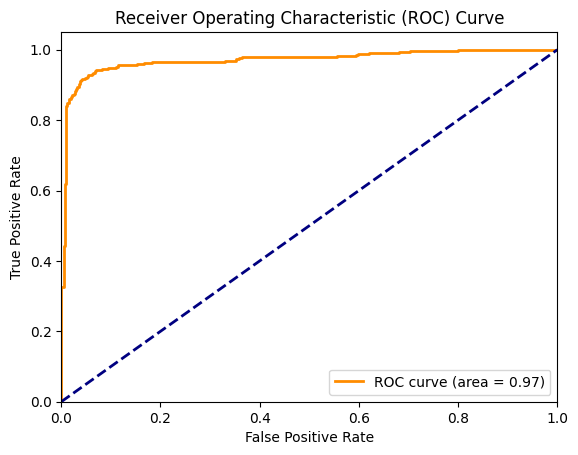


Training model for role:  ui engineer
Validation accuracy: 0.3921568691730499
16/16 [==============================] - 0s 2ms/step


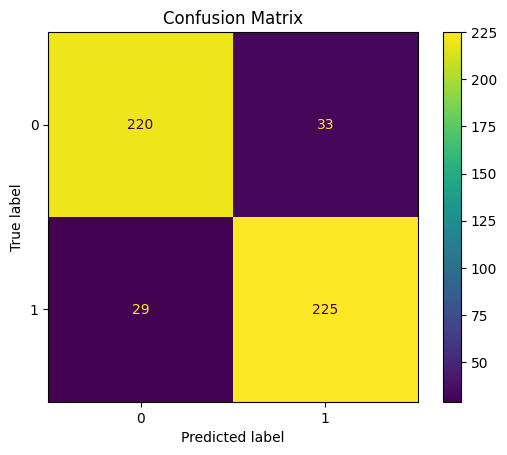

16/16 [==============================] - 0s 2ms/step


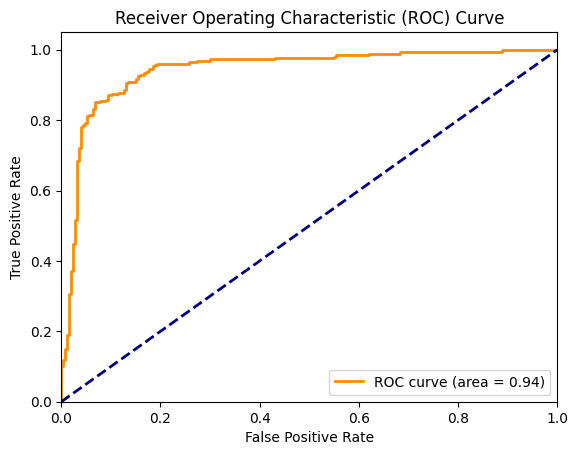


Training model for role:  data scientist
Validation accuracy: 0.6606060862541199
26/26 [==============================] - 0s 2ms/step


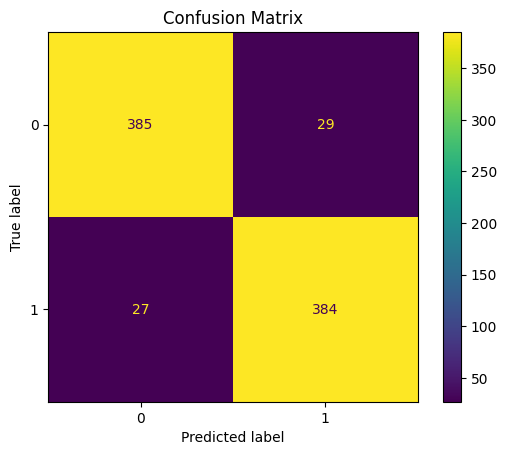

26/26 [==============================] - 0s 2ms/step


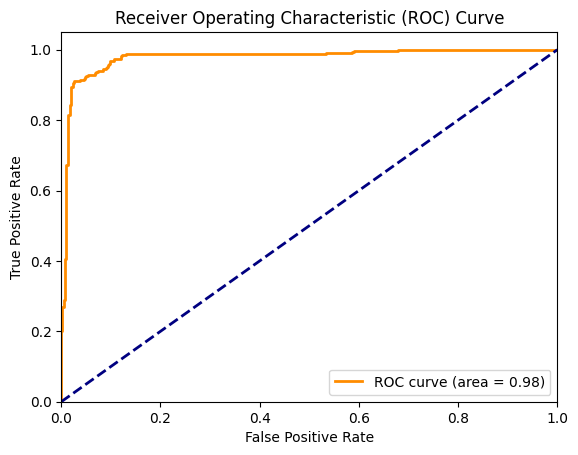


Training model for role:  data analyst
Validation accuracy: 0.5728155374526978
16/16 [==============================] - 0s 2ms/step


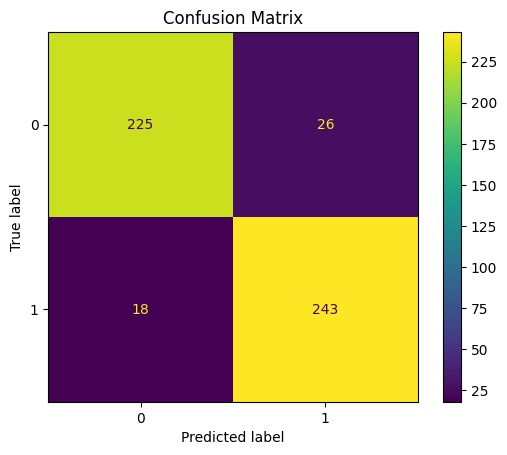

16/16 [==============================] - 0s 2ms/step


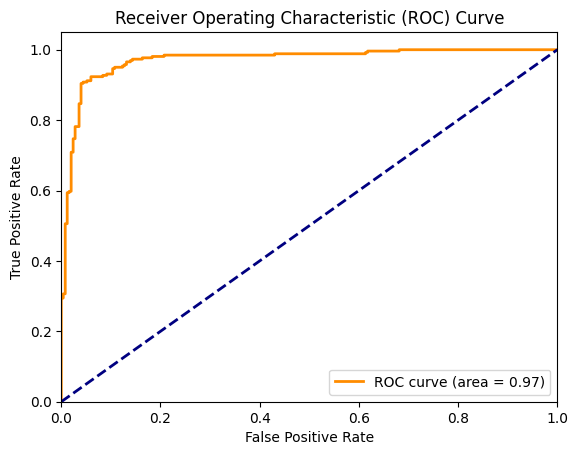


Training model for role:  ui designer
Validation accuracy: 0.95652174949646
8/8 [==============================] - 0s 2ms/step


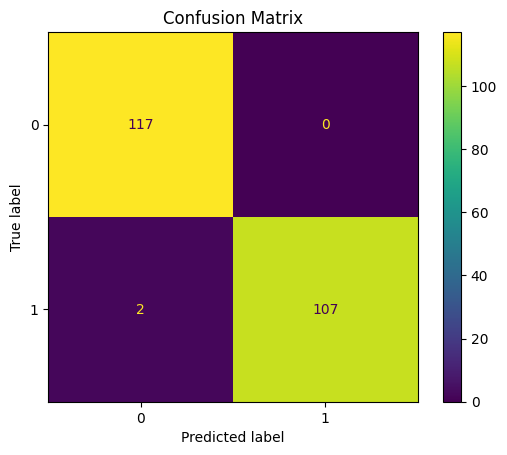

8/8 [==============================] - 0s 3ms/step


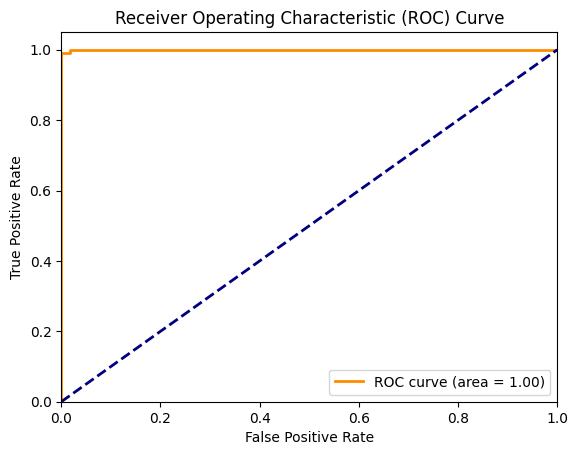

/tmp/ipython-input-323971868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(role_accuracies.keys()), y=list(role_accuracies.values()), palette='viridis')


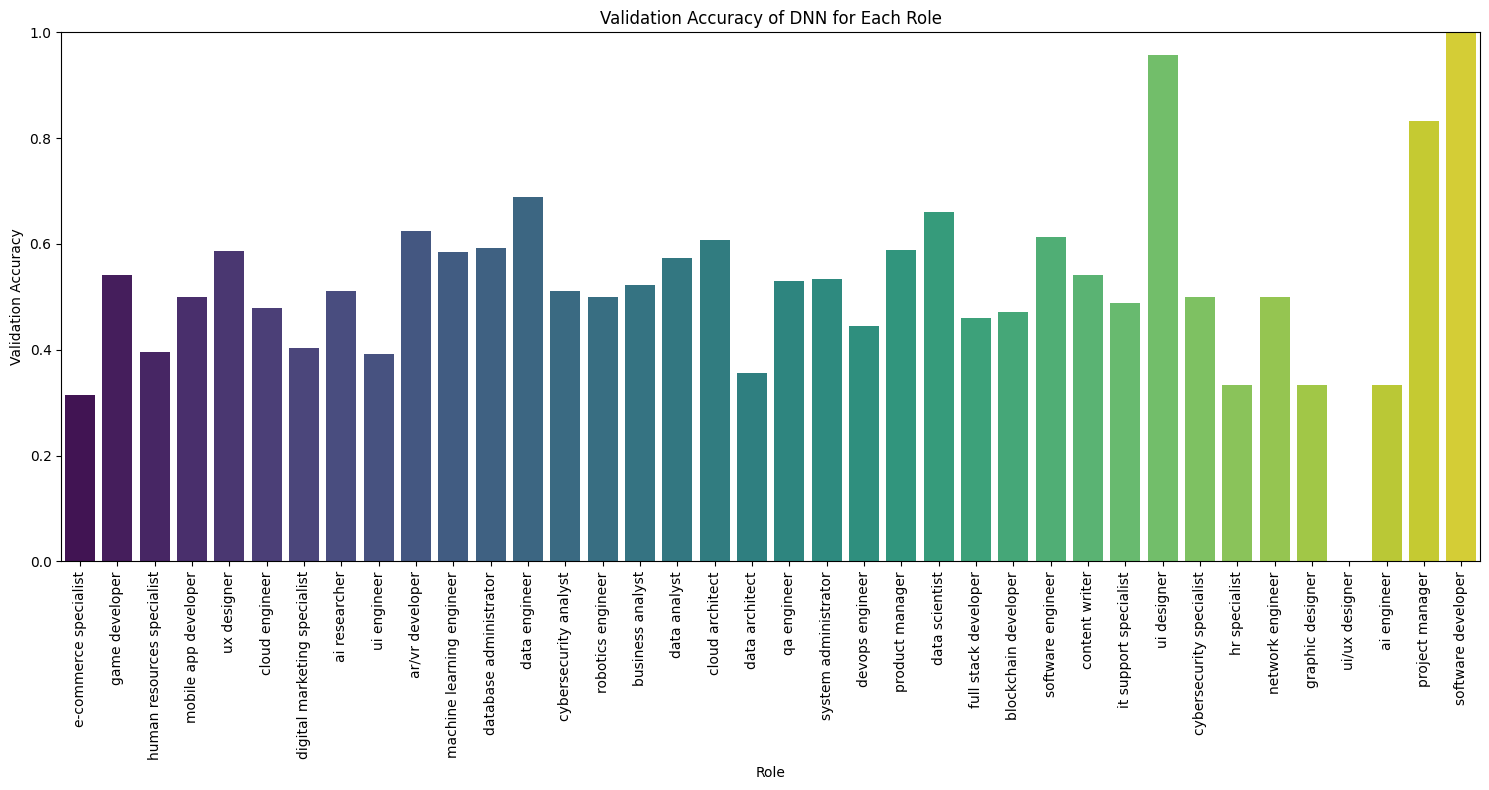

In [ ]:
## Create and visualize the models for all roles
roles = [role.lower() for role in df["Role"].unique()]

role_accuracies = {}

for role in roles:
  if role in roles:
    embeddings, results = role_based_embeddings(role)
    if len(embeddings) > 0 and len(results) > 0:
      print("\nTraining model for role: ", role)
      acc = role_model(role)
      if acc is not None:
        role_accuracies[role] = acc
    else:
      print("Skipping role ", role, " due to insufficient data.")
  else:
    print("Skipping role ", role, " as it's not in the predefined roles list.")

# Visualize the accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x=list(role_accuracies.keys()), y=list(role_accuracies.values()), palette='viridis')
plt.title('Validation Accuracy of DNN for Each Role')
plt.xlabel('Role')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=90)
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.tight_layout()
plt.show()